# Nobel Laureates

Analysis of data on Nobel Laureates scraped from nobelprize.org and available from Kaggle.com: https://www.kaggle.com/nobelfoundation/nobel-laureates


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

In [2]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.0f}'.format

Taking a peek at the first row of the data:

In [3]:
!head -n 1 archive.csv

Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country


In [4]:
nobeldf = pd.read_csv("archive.csv", parse_dates = ["Birth Date", "Death Date"])

In [5]:
nobeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
Year                    969 non-null int64
Category                969 non-null object
Prize                   969 non-null object
Motivation              881 non-null object
Prize Share             969 non-null object
Laureate ID             969 non-null int64
Laureate Type           969 non-null object
Full Name               969 non-null object
Birth Date              969 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
Death Date              617 non-null datetime64[ns]
Death City              599 non-null object
Death Country           605 non-null object
dtypes: datetime64[ns](1), int64(2), object(15)
memory usage: 136.3+ KB


*** The Birth Date didn't get converted to datetime because of missing values. ***

In [6]:
nobeldf.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


Index columns that we are going to need for the next few lines of code:

In [7]:
nobeldf["Laureate Type"].value_counts()

Individual      939
Organization     30
Name: Laureate Type, dtype: int64

In [8]:
columns = ["Year", "Category", "Birth Date", "Sex", "Organization Name", "Organization Country", "Death Date"]

In [9]:
nobeldf2 = nobeldf[columns]

In [10]:
nobeldf2.head()

,Year,Category,Birth Date,Sex,Organization Name,Organization Country,Death Date
0,1901,Chemistry,1852-08-30,Male,Berlin University,Germany,1911-03-01
1,1901,Literature,1839-03-16,Male,NaN,NaN,1907-09-07
2,1901,Medicine,1854-03-15,Male,Marburg University,Germany,1917-03-31
3,1901,Peace,1828-05-08,Male,NaN,NaN,1910-10-30
4,1901,Peace,1822-05-20,Male,NaN,NaN,1912-06-12


In [11]:
nobeldf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 7 columns):
Year                    969 non-null int64
Category                969 non-null object
Birth Date              969 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization Country    716 non-null object
Death Date              617 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 53.1+ KB


### Missing data

From above, we can see that there are missing data under "Sex", "Organization Name", "Organization Country", and "Death Date"

### How many categories and how are they distributed?

In [12]:
nobeldf.Category.value_counts()

Medicine      227
Physics       222
Chemistry     194
Peace         130
Literature    113
Economics      83
Name: Category, dtype: int64

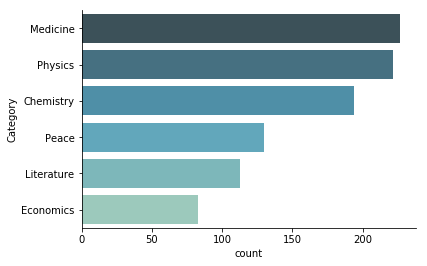

In [13]:
sns.countplot(y='Category', data= nobeldf, 
              order=nobeldf.Category.value_counts().index,
              palette='GnBu_d')
sns.despine();

## Males vs. Females

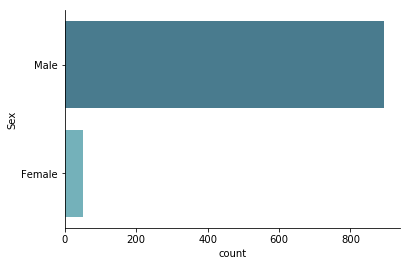

In [14]:
sns.countplot(y="Sex", data=nobeldf,
             palette='GnBu_d')
sns.despine()

## Awards by Country

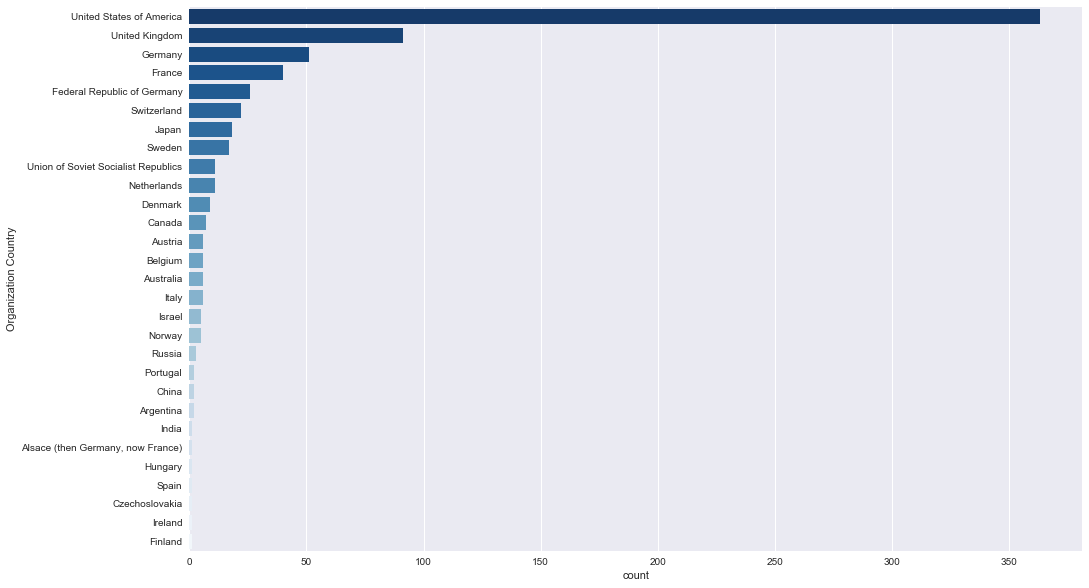

In [19]:
sns.countplot(y='Organization Country',
              data=nobeldf,
              order=nobeldf['Organization Country'].value_counts().index,
              palette='Blues_r')
sns.set(rc={"figure.figsize": (16, 15)})
sns.despine();

## Age of nobel laureates (at the time of award)

- Calculate the age using "Year" and "Birth Date"

But there are missing values:

In [20]:
nobeldf2.isnull().sum()

Year                      0
Category                  0
Birth Date                0
Sex                      26
Organization Name       247
Organization Country    253
Death Date              352
dtype: int64

In [21]:
nobeldf2["Birth Date"].value_counts().head()

nan           29
1938-03-07     3
1881-03-23     3
1930-03-15     3
1952-11-09     3
Name: Birth Date, dtype: int64

--> Replace "nan" with 0s:

In [22]:
nobeldf2 = nobeldf2.replace(to_replace = "nan", value=0)

Create new column, "Birth Year":

In [23]:
nobeldf2["Birth Year"] = nobeldf2["Birth Date"].str[0:4]

In [24]:
nobeldf2['Birth Year'].head()

0    1852
1    1839
2    1854
3    1828
4    1822
Name: Birth Year, dtype: object

In [25]:
nobeldf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 8 columns):
Year                    969 non-null int64
Category                969 non-null object
Birth Date              969 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization Country    716 non-null object
Death Date              617 non-null datetime64[ns]
Birth Year              940 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 60.6+ KB


Convert "Birth Year" column from str to numeric:

In [26]:
nobeldf2["Birth Year"] = pd.to_numeric(nobeldf2["Birth Year"])

In [27]:
nobeldf2["Birth Year"].head()

0   1,852
1   1,839
2   1,854
3   1,828
4   1,822
Name: Birth Year, dtype: float64

In [28]:
nobeldf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 8 columns):
Year                    969 non-null int64
Category                969 non-null object
Birth Date              969 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization Country    716 non-null object
Death Date              617 non-null datetime64[ns]
Birth Year              940 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 60.6+ KB


Calculation of age during awarding of Nobel:

In [29]:
nobeldf2["Age"] = nobeldf2["Year"] - nobeldf2["Birth Year"]

In [30]:
nobeldf2.Age.value_counts().head()

61    35
63    34
64    34
56    33
54    33
Name: Age, dtype: int64

In [31]:
nobeldf2.Age.describe()

count   940
mean     59
std      12
min      17
25%      50
50%      60
75%      69
max      90
Name: Age, dtype: float64

#### Distribution of age of Nobel Prize awardees

/Users/alonavarshal/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


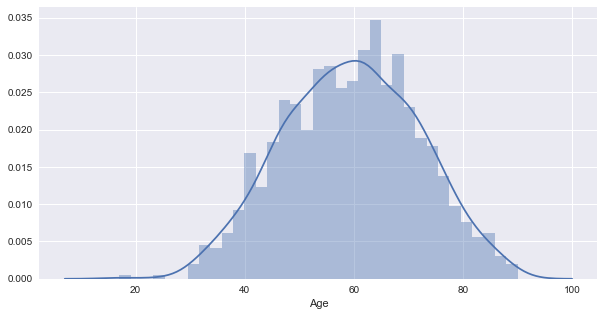

In [34]:
sns.distplot(nobeldf2["Age"].dropna(), bins=35)
sns.set(rc={"figure.figsize": (10,5)});

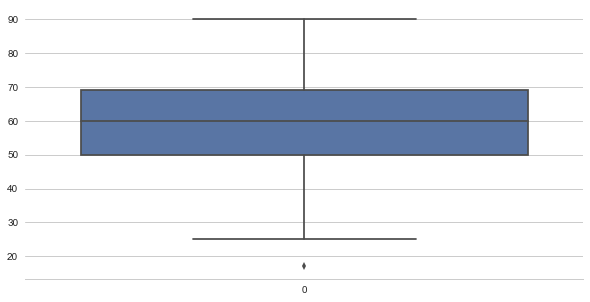

In [35]:
sns.set_style("whitegrid")
sns.boxplot(data=nobeldf2.Age)
sns.despine(left=True)

## You are most likely to be awarded a Nobel Prize if you are:

1. a male
2. in the area of medicine
3. living in the USA
4. around 60 years old